# Single Layer Perceptron untuk Klasifikasi Dataset Iris

## Deskripsi Tugas
Implementasi Single Layer Perceptron (SLP) untuk klasifikasi binary pada dataset Iris dengan spesifikasi:
- **Dataset**: Iris (hanya kelas Setosa dan Versicolor)
- **Model**: Single Layer Perceptron
- **Parameters**: 5 epochs, learning rate = 0.1, error function = SSE
- **Labels**: Setosa = 0, Versicolor = 1

## Tim :
Ravie Arjun Nadhief (23/522765/PA/22491)
Dzaky Rafiansyah (23/513862/PA/21961)
Khairumayzal Dwiksanendra (23/513946/PA/21969)
Zaky Alraiz Kadarisman (23/516033/PA/22047)
Nasya Putri Raudhah (23/513931/PA/21967)

### Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Load Iris Dataset

In [ ]:
# Load dataset Iris
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Dataset Iris berhasil dimuat!")
print(f"Shape data: {X.shape}")
print(f"Shape target: {y.shape}")
print(f"Nama features: {feature_names}")
print(f"Nama kelas: {target_names}")
print(f"Distribusi kelas original: {np.bincount(y)}")

# Filter dataset untuk hanya menggunakan Setosa (0) dan Versicolor (1)
mask = y != 2  # Ambil semua kecuali Virginica (2)
X_filtered = X[mask]
y_filtered = y[mask]

print(f"\nSetelah filtering:")
print(f"Shape data: {X_filtered.shape}")
print(f"Shape target: {y_filtered.shape}")
print(f"Distribusi kelas: Setosa={np.sum(y_filtered==0)}, Versicolor={np.sum(y_filtered==1)}")

Dataset Iris berhasil dimuat!
Shape data: (150, 4)
Shape target: (150,)
Nama features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nama kelas: ['setosa' 'versicolor' 'virginica']
Distribusi kelas original: [50 50 50]

Setelah filtering:
Shape data: (100, 4)
Shape target: (100,)
Distribusi kelas: Setosa=50, Versicolor=50


In [ ]:
# Buat DataFrame dari data hasil filter
iris_df = pd.DataFrame(X_filtered, columns=feature_names)
iris_df["target"] = y_filtered

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Split Dataset

In [ ]:
# Split manual: 40 train + 10 val per kelas
train_df = pd.concat([iris_df[0:40], iris_df[50:90]])
val_df = pd.concat([iris_df[40:50], iris_df[90:100]])

In [ ]:
# Memisahkan fitur dan target
X_train = train_df.drop('target', axis=1).values
y_train = train_df['target'].values
X_val = val_df.drop('target', axis=1).values
y_val = val_df['target'].values

print(X_train)
print(y_train)
print(X_val)
print(y_val)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.

### Inisialisasi Fungsi

In [ ]:
def inisialisasi_bobot(n_features):
    bobot = np.full(n_features, 0.5)  # semua bobot awal = 0.5
    bias = 0.5
    return bobot, bias

def aktivasi(z):
    return 1 / (1 + np.exp(-z))  # sigmoid

def dot_product(X, bobot, bias):
    return np.dot(X, bobot) + bias

def prediksi(inputs, bobot, bias):
    pred_value = aktivasi(dot_product(inputs, bobot, bias))
    class_pred = 1 if pred_value >= 0.5 else 0
    return class_pred, pred_value

def evaluate(X, y, bobot, bias):
    total_loss, correct = 0, 0
    for inputs, target in zip(X, y):
        class_pred, pred_value = prediksi(inputs, bobot, bias)
        error = pred_value - target
        total_loss += error**2
        correct += (class_pred == target)
    loss = total_loss / len(X)
    acc = correct / len(X)
    return loss, acc

def train(X_train, y_train, X_val, y_val, lr=0.1, epochs=200):
    bobot, bias = inisialisasi_bobot(X_train.shape[1])
    history = []

    for epoch in range(1, epochs + 1):
        total_train_loss, correct_train = 0, 0

        for inputs, target in zip(X_train, y_train):
            class_pred, pred_value = prediksi(inputs, bobot, bias)
            error = pred_value - target

            # update bobot dan bias
            grad = 2 * error * pred_value * (1 - pred_value)
            bobot -= lr * grad * inputs
            bias -= lr * grad

            total_train_loss += error**2
            correct_train += (class_pred == target)

        train_loss = total_train_loss / len(X_train)
        train_acc = correct_train / len(X_train)

        # validasi
        val_loss, val_acc = evaluate(X_val, y_val, bobot, bias)

        history.append({
            'epoch': epoch,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'val_loss': val_loss,
            'val_acc': val_acc
        })

    return bobot, bias, pd.DataFrame(history)


### Training and Validation


In [ ]:
bobot, bias, history = train(X_train, y_train, X_val, y_val, lr=0.1, epochs=5)

print(history.head())

   epoch  train_loss  train_acc  val_loss  val_acc
0      1    0.450046     0.5250  0.328014     0.50
1      2    0.037215     0.9500  0.246373     0.50
2      3    0.024224     0.9750  0.175153     0.50
3      4    0.017254     0.9750  0.118946     0.85
4      5    0.012664     0.9875  0.081341     1.00


### Visualisasi Grafik Loss dan Accuracy

In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Grafik Loss
    ax[0].plot(history['epoch'], history['train_loss'], label='Train Loss')
    ax[0].plot(history['epoch'], history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss (MSE)")
    ax[0].set_title("Training vs Validation Loss")
    ax[0].legend()
    ax[0].set_xticks(history['epoch'])

    # Grafik Akurasi
    ax[1].plot(history['epoch'], history['train_acc'], label='Train Accuracy')
    ax[1].plot(history['epoch'], history['val_acc'], label='Validation Accuracy')
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Training vs Validation Accuracy")
    ax[1].legend()
    ax[1].set_xticks(history['epoch'])

    plt.show()




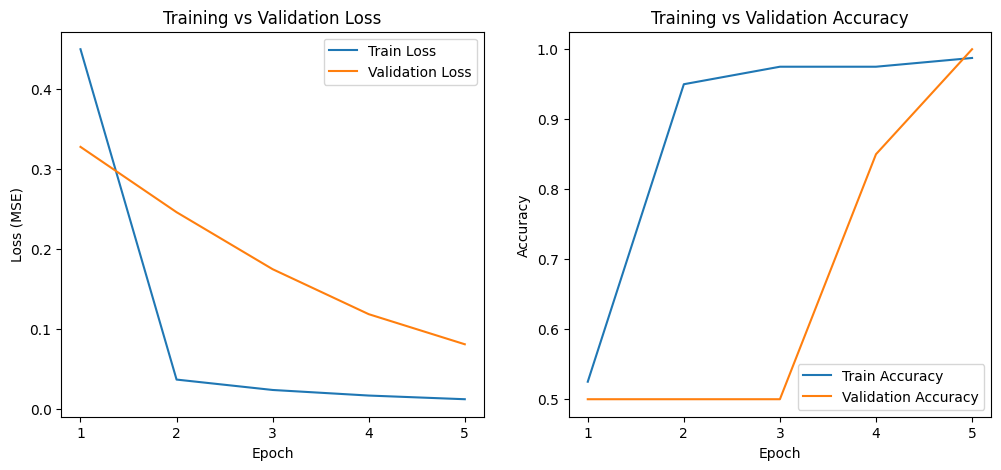

In [ ]:
bobot, bias, history = train(X_train, y_train, X_val, y_val, lr=0.1, epochs=5)

plot_history(history)